In [12]:
import cv2
import numpy as np

path=r'E:\tensorrt\TRIP\Experimenter_9110002_53.mp4'
cam=cv2.VideoCapture(path)
width = int(cam.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cam.get(cv2.CAP_PROP_FRAME_HEIGHT))
total_frames = int(cam.get(cv2.CAP_PROP_FRAME_COUNT))

new_ROI=np.array([[0.19375,0.99259259],
       [0.47395833,0.56111111],
       [0.54375,0.56111111],
       [0.96770833, 0.99259259]])
frame_size=np.array([width//2,height//2])
new_ROI=new_ROI*frame_size
new_ROI=new_ROI.astype('int')

while cam.isOpened():
    ret,frame=cam.read()
    if not ret:
        print("End of Video")
        break
    # print(frame.shape)
    frame_scene=frame[:height//2,:width//2]
    frame_bottom=frame[height//2:,:width//2]
    frame_scene = cv2.polylines(frame_scene, pts=[new_ROI], color=(60,255,255), isClosed=True,thickness=2)
 
   
    cv2.imshow('frame_scene',frame_scene)
    # cv2.setMouseCallback('frame_scene',mouse_callback)
 
    if cv2.waitKey(1) & 0xFF==27:
        print("Quitting the program")
        break
cam.release()
cv2.destroyAllWindows()

Quitting the program


Mouse clicked at x=371, y=474
Mouse clicked at x=393, y=398
Mouse clicked at x=426, y=324
Mouse clicked at x=496, y=290
Mouse clicked at x=571, y=251
Mouse clicked at x=681, y=223
Mouse clicked at x=757, y=233
Mouse clicked at x=802, y=285
Mouse clicked at x=820, y=320
Mouse clicked at x=710, y=401
Mouse clicked at x=675, y=449
Mouse clicked at x=639, y=471
Mouse clicked at x=468, y=474
Mouse clicked at x=415, y=470

In [142]:
new_ROI=np.array([[371,474],[393,398],[426,324],[496,290],[571,251],[681,223],[757,233]\
                  ,[802,285],[820,320],[710,401],[675,449],[639,471],[468,474],[415,470]])

In [ ]:
frame_shape=np.array([width//2,height//2])

In [152]:
# Normalised steer points
steer=np.array([[0.38645833, 0.87777778],
       [0.409375  , 0.73703704],
       [0.44375   , 0.6       ],
       [0.51666667, 0.53703704],
       [0.59479167, 0.46481481],
       [0.709375  , 0.41296296],
       [0.78854167, 0.43148148],
       [0.83541667, 0.52777778],
       [0.85416667, 0.59259259],
       [0.73958333, 0.74259259],
       [0.703125  , 0.83148148],
       [0.665625  , 0.87222222],
       [0.4875    , 0.87777778],
       [0.43229167, 0.87037037]])

In [151]:
new_ROI/np.array([width//2,height//2])

array([[0.38645833, 0.87777778],
       [0.409375  , 0.73703704],
       [0.44375   , 0.6       ],
       [0.51666667, 0.53703704],
       [0.59479167, 0.46481481],
       [0.709375  , 0.41296296],
       [0.78854167, 0.43148148],
       [0.83541667, 0.52777778],
       [0.85416667, 0.59259259],
       [0.73958333, 0.74259259],
       [0.703125  , 0.83148148],
       [0.665625  , 0.87222222],
       [0.4875    , 0.87777778],
       [0.43229167, 0.87037037]])

In [148]:
import matplotlib.path as mpltPath
def mouse_callback(event, x, y, flags, param):
    new_ROI=param
    if event==cv2.EVENT_LBUTTONDOWN:
        path = mpltPath.Path(new_ROI)
        inside_points = path.contains_points([np.array([x,y])])
        if not inside_points:
            print("True")
        else:
            print("False")
        # print(f'Mouse clicked at x={x}, y={y}')
frame_roi_img = cv2.polylines(frame_bottom, pts=[new_ROI], color=(60,255,255), isClosed=True,thickness=2)
cv2.imshow('test',frame_roi_img)
cv2.setMouseCallback('test',mouse_callback,param=(new_ROI))
cv2.waitKey(0)
cv2.destroyAllWindows()

True
False
True
True
True
True
True
True
True
True


In [ ]:

path = mpltPath.Path(new_ROI)
inside_points = path.contains_points(np.array([bottom_right_bbox,mid_bottom_bbox,bottom_left_bbox, mid_left_bbox, mid_right_bbox]))

In [ ]:
mask_new=np.ones((height//2,width//2,3),dtype='uint8')*255
cv2.fillPoly(mask_new, pts=[new_ROI], color=(0,0,0))

cv2.imshow('test',mask_new)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [5]:
import numpy as np
new_ROI=np.array([[186,536],[455,303],[522,303],[929,536]])

In [23]:
new_ROI=np.array([[0.19375,0.99259259],
       [0.47395833,0.56111111],
       [0.54375,0.56111111],
       [0.96770833, 0.99259259]])*frame_size

In [25]:
new_ROI.astype('int')

array([[186, 535],
       [454, 302],
       [522, 302],
       [928, 535]])

In [20]:
frame_size=np.array([width//2,height//2])

In [22]:
frame_size

array([960, 540])

In [21]:
new_ROI/frame_size

array([[0.19375   , 0.99259259],
       [0.47395833, 0.56111111],
       [0.54375   , 0.56111111],
       [0.96770833, 0.99259259]])

In [15]:
frame_roi_img = cv2.polylines(frame_scene, pts=[new_ROI], color=(60,255,255), isClosed=True,thickness=2)

Mouse clicked at x=186, y=537
Mouse clicked at x=455, y=301
Mouse clicked at x=522, y=303
Mouse clicked at x=929, y=536

In [16]:
cv2.imshow('test',frame_roi_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Data Analysis

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'E:\tensorrt\Trip\cleaned_expermenter.csv')
index_list=df[df['FollowCarBrakingStatus']>0].index
for i in index_list:
    df.loc[i,'FollowCarBrakingStatus']=1

In [3]:
df.columns

Index(['DatTime', 'MediaTime', 'LonAccel', 'LatAccel', 'Throttle', 'Brake',
       'Gear', 'Heading', 'HeadwayDistance', 'HeadwayTime', 'Lane',
       'LaneOffset', 'RoadOffset', 'Steer', 'Velocity', 'XPos', 'YPos',
       'LeadVehPosX', 'LeadVehPosY', 'FollowCarBrakingStatus'],
      dtype='object')

<Axes: >

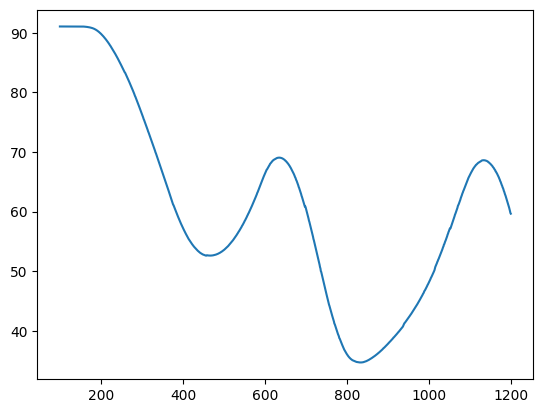

In [54]:
df['HeadwayDistance'][100:1200].plot()

In [61]:
df[df['HeadwayDistance']>100]

,DatTime,MediaTime,LonAccel,LatAccel,Throttle,Brake,Gear,Heading,HeadwayDistance,HeadwayTime,Lane,LaneOffset,RoadOffset,Steer,Velocity,XPos,YPos,LeadVehPosX,LeadVehPosY,FollowCarBrakingStatus
1215,40.4900,41.099959,-0.001095,-0.001537,1.308809,0.000000,3.0,359.682940,5027.535942,3.406921e+02,2.0,-0.286629,5.113371,-0.000169,14.755206,-462.246490,14.213371,14.115293,-407.184201,1.0
1270,42.3235,42.933290,-0.000021,0.020637,1.308809,21.074884,3.0,359.543596,5021.698200,5.002321e+03,1.0,-0.205080,2.494919,-0.000571,9.363067,-439.812989,14.065600,13.894238,-396.584525,0.0
1371,45.6905,46.299954,0.000096,0.000024,21.459581,0.000000,3.0,358.792404,5023.559704,5.002109e+03,1.0,-0.244600,2.455400,-0.000826,11.181743,-407.137863,13.629481,12.862979,-360.357752,0.0
1888,62.9245,63.533270,0.000002,-0.000211,19.164980,0.000000,3.0,358.238471,10000.000000,7.851288e+02,2.0,-0.247466,5.152534,0.001828,12.736824,-201.597626,5.933202,5.401016,-139.141256,0.0
1889,62.9565,63.566603,-0.000029,-0.000218,19.164980,0.000000,3.0,358.248340,10000.000000,7.837863e+02,2.0,-0.248536,5.151464,0.001824,12.758637,-201.279053,5.923520,5.400690,-138.694217,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13871,462.3555,462.966204,0.000000,0.000000,1.308809,0.000000,0.0,359.853461,10000.000000,1.000000e+04,1.0,-0.356143,1.443857,0.000628,0.000000,6628.983398,1.443857,2.302970,965.311264,0.0
13872,462.3895,462.999537,0.000000,0.000000,1.308809,0.000000,0.0,359.853461,10000.000000,1.000000e+04,1.0,-0.356143,1.443857,0.000628,0.000000,6628.983398,1.443857,2.302970,965.311264,0.0
13873,462.4215,463.032870,0.000000,0.000000,1.308809,0.000000,0.0,359.853461,10000.000000,6.414105e+14,1.0,-0.356143,1.443857,0.000628,0.000000,6628.983398,1.443857,2.302970,965.311264,0.0
13874,462.4550,463.066204,0.000000,0.000000,1.308809,0.000000,0.0,359.853461,10000.000000,1.821877e+14,1.0,-0.356143,1.443857,0.000628,0.000000,6628.983398,1.443857,2.302970,965.311264,0.0


In [65]:
df[df['HeadwayDistance']>8000]['HeadwayDistance'].unique()

array([10000.])

Text(0.5, 1.0, 'Histogram of Column Data')

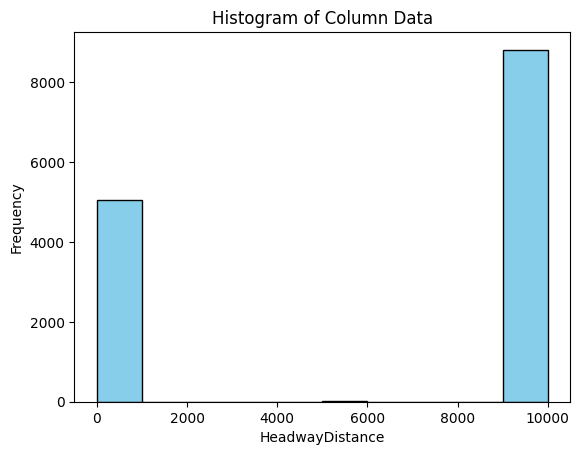

In [62]:
import matplotlib.pyplot as plt
plt.hist(df['HeadwayDistance'], bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('HeadwayDistance')
plt.ylabel('Frequency')
plt.title('Histogram of Column Data')

<Axes: >

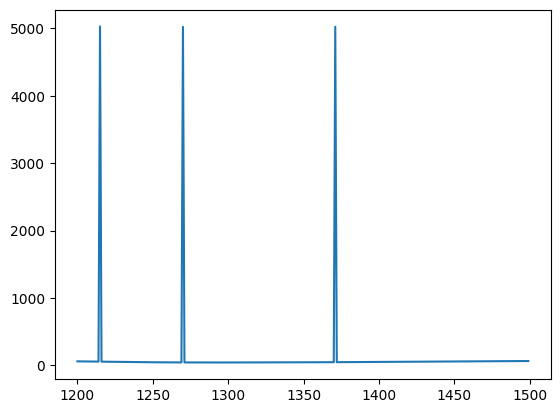

In [55]:
df['HeadwayDistance'][1200:1500].plot()

In [66]:
df['HeadWayVehicle']=df['HeadwayDistance'].apply(lambda x: True if x!=10000 else False)

In [ ]:
import numpy as np
HeadwayDist=[]
for i in range(len(df)):
    if len(HeadwayDist)<10:
        if df['HeadwayDistance'][i]<2000:
            HeadwayDist.append(df['HeadwayDistance'][i])
        else:
            if len(HeadwayDist)>0 and df['HeadwayDistance'][i]<8000:
                df.loc[i,'HeadwayDistance']=np.mean(HeadwayDist)
                # df['HeadwayDistance'][i]=np.mean(HeadwayDist)
            
    else:
        if df['HeadwayDistance'][i]<2000:
            _=HeadwayDist.pop(0)
            HeadwayDist.append(df['HeadwayDistance'][i])
        else:
            if len(HeadwayDist)>0 and df['HeadwayDistance'][i]<8000:
                # df['HeadwayDistance'][i]=np.mean(HeadwayDist)
                df.loc[i,'HeadwayDistance']=np.mean(HeadwayDist)


            

In [86]:
df[df['HeadwayDistance']>8000]

,DatTime,MediaTime,LonAccel,LatAccel,Throttle,Brake,Gear,Heading,HeadwayDistance,HeadwayTime,Lane,LaneOffset,RoadOffset,Steer,Velocity,XPos,YPos,LeadVehPosX,LeadVehPosY,FollowCarBrakingStatus
1888,62.9245,63.533270,0.000002,-0.000211,19.164980,0.0,3.0,358.238471,10000.0,7.851288e+02,2.0,-0.247466,5.152534,0.001828,12.736824,-201.597626,5.933202,5.401016,-139.141256,0.0
1889,62.9565,63.566603,-0.000029,-0.000218,19.164980,0.0,3.0,358.248340,10000.0,7.837863e+02,2.0,-0.248536,5.151464,0.001824,12.758637,-201.279053,5.923520,5.400690,-138.694217,0.0
1890,62.9905,63.599936,-0.000100,-0.000231,19.164980,0.0,3.0,358.264807,10000.0,7.815803e+02,2.0,-0.251983,5.148017,0.001839,12.794922,-200.746964,5.907463,5.400230,-137.949152,0.0
1891,63.0235,63.633270,-0.000175,-0.000243,19.164980,0.0,3.0,358.278040,10000.0,7.798155e+02,2.0,-0.255065,5.144935,0.001880,12.823873,-200.320053,5.894705,5.399947,-137.353100,0.0
1892,63.0570,63.666603,-0.000258,-0.000255,19.164980,0.0,3.0,358.291356,10000.0,7.780608e+02,2.0,-0.258066,5.141934,0.001908,12.852773,-199.892296,5.882009,5.399715,-136.757048,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13871,462.3555,462.966204,0.000000,0.000000,1.308809,0.0,0.0,359.853461,10000.0,1.000000e+04,1.0,-0.356143,1.443857,0.000628,0.000000,6628.983398,1.443857,2.302970,965.311264,0.0
13872,462.3895,462.999537,0.000000,0.000000,1.308809,0.0,0.0,359.853461,10000.0,1.000000e+04,1.0,-0.356143,1.443857,0.000628,0.000000,6628.983398,1.443857,2.302970,965.311264,0.0
13873,462.4215,463.032870,0.000000,0.000000,1.308809,0.0,0.0,359.853461,10000.0,6.414105e+14,1.0,-0.356143,1.443857,0.000628,0.000000,6628.983398,1.443857,2.302970,965.311264,0.0
13874,462.4550,463.066204,0.000000,0.000000,1.308809,0.0,0.0,359.853461,10000.0,1.821877e+14,1.0,-0.356143,1.443857,0.000628,0.000000,6628.983398,1.443857,2.302970,965.311264,0.0


In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['HeadwayDistance'], bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('HeadwayDistance')
plt.ylabel('Frequency')
plt.title('Histogram of Column Data')

In [88]:
df.columns

Index(['DatTime', 'MediaTime', 'LonAccel', 'LatAccel', 'Throttle', 'Brake',
       'Gear', 'Heading', 'HeadwayDistance', 'HeadwayTime', 'Lane',
       'LaneOffset', 'RoadOffset', 'Steer', 'Velocity', 'XPos', 'YPos',
       'LeadVehPosX', 'LeadVehPosY', 'FollowCarBrakingStatus'],
      dtype='object')

In [ ]:
df[df['Brake']>0]['FollowCarBrakingStatus']

Text(0.5, 1.0, 'Comparison of brake applied by the driver')

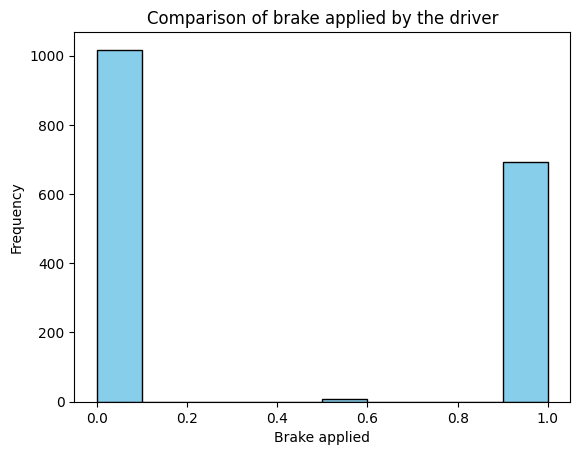

In [92]:
import matplotlib.pyplot as plt
plt.hist(df[df['Brake']>0]['FollowCarBrakingStatus'], bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Brake applied')
plt.ylabel('Frequency')
plt.title('Comparison of brake applied by the driver')

In [106]:
index_list=df[df['FollowCarBrakingStatus']>0].index
for i in index_list:
    df.loc[i,'FollowCarBrakingStatus']=1

In [107]:
df['FollowCarBrakingStatus'].unique()

array([0., 1.])

In [101]:
df['FollowCarBrakingStatus'].unique()

array([0. , 1. , 0.5])

In [ ]:
df['Brake'][0:200].plot()

<Axes: >

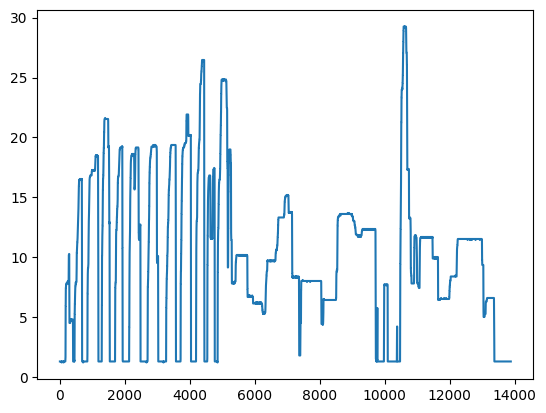

In [114]:
df['Throttle'].plot()

Text(0.5, 1.0, 'Throttle by the driver')

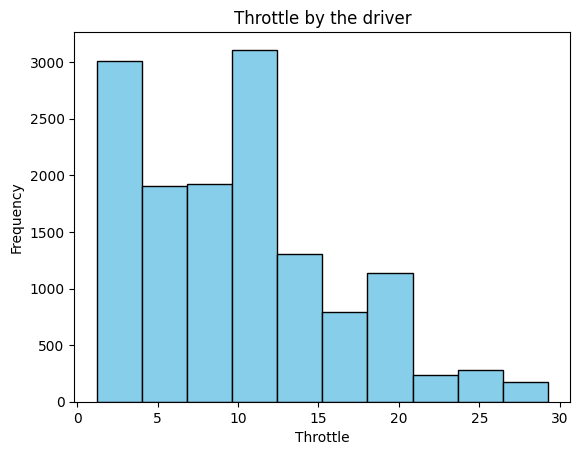

In [118]:
plt.hist(df['Throttle'], bins=10, color='skyblue', edgecolor='black')
# Add labels and title
plt.xlabel('Throttle')
plt.ylabel('Frequency')
plt.title('Throttle by the driver')

Text(0.5, 1.0, 'Velocity Histogram')

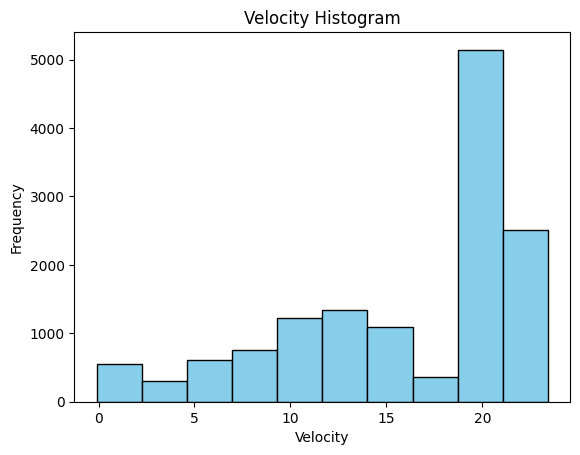

In [121]:
plt.hist(df['Velocity'], bins=10, color='skyblue', edgecolor='black')
# Add labels and title
plt.xlabel('Velocity')
plt.ylabel('Frequency')
plt.title('Velocity Histogram')

In [ ]:
df[df['Velocity']>15]['FollowCarBrakingStatus']

Text(0.5, 1.0, 'Throttle by the driver')

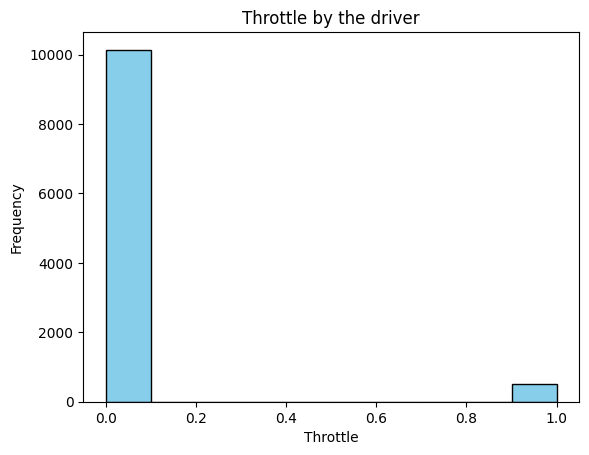

In [123]:
plt.hist(df[df['Throttle']>5]['FollowCarBrakingStatus'], bins=10, color='skyblue', edgecolor='black')
# Add labels and title
plt.xlabel('Throttle')
plt.ylabel('Frequency')
plt.title('Throttle by the driver')

In [ ]:
df[(df['Throttle']>5)& (df['FollowCarBrakingStatus']==1)]['LeadVehPosY'].plot()

Text(0.5, 1.0, 'Steer Values Histogram')

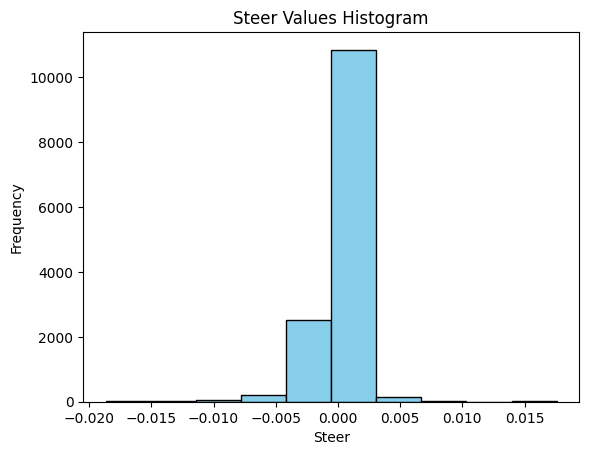

In [129]:
plt.hist(df['Steer'], bins=10, color='skyblue', edgecolor='black')
# Add labels and title
plt.xlabel('Steer')
plt.ylabel('Frequency')
plt.title('Steer Values Histogram')

In [131]:
df[(df['Steer']>0.005) | (df['Steer']<-0.005)]

,DatTime,MediaTime,LonAccel,LatAccel,Throttle,Brake,Gear,Heading,HeadwayDistance,HeadwayTime,Lane,LaneOffset,RoadOffset,Steer,Velocity,XPos,YPos,LeadVehPosX,LeadVehPosY,FollowCarBrakingStatus
0,0.0245,0.133333,0.000574,0.010176,1.308809,0.0,0.0,359.999621,91.047180,12695.076787,2.0,0.021679,5.421679,-0.005921,0.028037,-741.047180,14.521677,2.310232,1629.744985,0.0
1,0.0570,0.166666,0.000799,0.034130,1.308809,0.0,0.0,359.999308,91.044922,947.565918,2.0,0.021674,5.421674,-0.005922,0.097060,-741.044921,14.521672,2.310232,1629.744985,0.0
2,0.0905,0.200000,0.000550,0.034884,1.308809,0.0,0.0,359.999040,91.041473,939.188133,2.0,0.021672,5.421672,-0.005924,0.097702,-741.041473,14.521670,2.310232,1629.744985,0.0
3,0.1235,0.233333,0.000061,0.017936,1.308809,0.0,0.0,359.998984,91.039093,2905.461464,2.0,0.021674,5.421674,-0.005925,0.040045,-741.039093,14.521672,2.310232,1629.744985,0.0
4,0.1570,0.266666,-0.000326,-0.001660,1.308809,0.0,0.0,359.999149,91.038971,10000.000000,2.0,0.021679,5.421679,-0.005925,-0.032792,-741.038971,14.521677,2.310232,1629.744985,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8458,281.9230,282.533051,-0.001811,-0.000085,6.440374,0.0,3.0,359.615982,10000.000000,513.625394,1.0,-1.118636,0.681364,0.006145,19.469972,3263.600220,0.681364,2.302970,965.311264,0.0
8459,281.9555,282.566384,0.000284,-0.000146,6.440374,0.0,3.0,359.675200,10000.000000,513.676144,1.0,-1.123535,0.676465,0.005874,19.467909,3264.249145,0.676465,2.302970,965.311264,0.0
8460,281.9895,282.599717,0.001706,-0.000193,6.440374,0.0,3.0,359.732481,10000.000000,513.727383,1.0,-1.127832,0.672168,0.005639,19.465847,3264.898071,0.672168,2.302970,965.311264,0.0
8461,282.0225,282.633051,0.002494,-0.000225,6.440374,0.0,3.0,359.787554,10000.000000,513.779011,1.0,-1.131532,0.668468,0.005426,19.463788,3265.546998,0.668468,2.302970,965.311264,0.0


In [115]:
df[df['Brake']>0]['Throttle']

91       1.308809
92       1.308809
93       1.308809
94       1.308809
95       1.308809
           ...   
13684    1.308809
13685    1.308809
13686    1.308809
13687    1.308809
13688    1.308809
Name: Throttle, Length: 1718, dtype: float64

Text(0.5, 1.0, 'Heading Values Histogram')

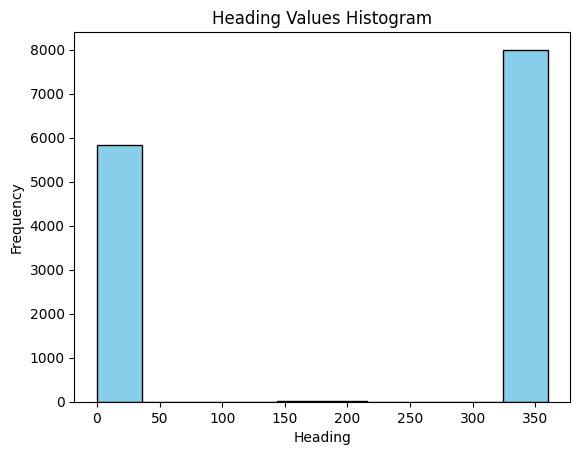

In [133]:
plt.hist(df['Heading'], bins=10, color='skyblue', edgecolor='black')
# Add labels and title
plt.xlabel('Heading')
plt.ylabel('Frequency')
plt.title('Heading Values Histogram')

<Axes: >

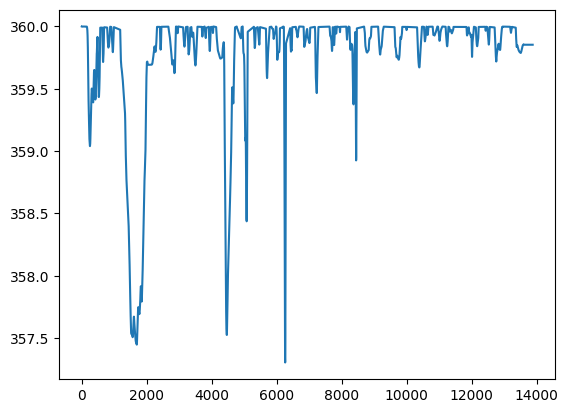

In [136]:
df[df['Heading']>200]['Heading'].plot()

In [139]:
df.columns

Index(['DatTime', 'MediaTime', 'LonAccel', 'LatAccel', 'Throttle', 'Brake',
       'Gear', 'Heading', 'HeadwayDistance', 'HeadwayTime', 'Lane',
       'LaneOffset', 'RoadOffset', 'Steer', 'Velocity', 'XPos', 'YPos',
       'LeadVehPosX', 'LeadVehPosY', 'FollowCarBrakingStatus'],
      dtype='object')

In [58]:
plt.hist(df['Heading'], bins=10, color='skyblue', edgecolor='black')
# Add labels and title
plt.xlabel('Heading')
plt.ylabel('Frequency')
plt.title('Heading Values Histogram')

8.641797493878727

In [59]:
0.086*(422)

36.291999999999994

<Axes: >

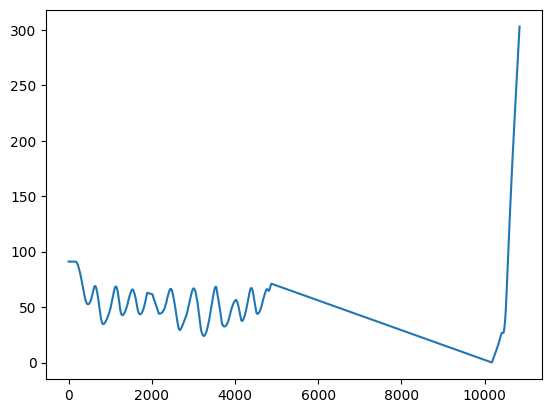

In [138]:
df['HeadwayDistance'][df['HeadwayDistance']<5000].plot()

In [42]:
df[df['FollowCarBrakingStatus']==0.5]

,DatTime,MediaTime,LonAccel,LatAccel,Throttle,Brake,Gear,Heading,HeadwayDistance,HeadwayTime,Lane,LaneOffset,RoadOffset,Steer,Velocity,XPos,YPos,LeadVehPosX,LeadVehPosY,FollowCarBrakingStatus
1226,40.8565,41.466625,-0.000058,-5.198300e-02,1.308809,37.066582,3.0,359.662465,51.686268,3.668716,2.0,-0.316947,5.083054,-0.000322,14.087633,-456.921905,14.183053,14.024676,-405.286019,0.5
1652,55.0565,55.666611,-0.000112,-2.166350e-02,1.308809,35.147581,3.0,357.500287,49.280090,4.618657,2.0,-0.248420,5.151580,-0.000501,10.668563,-278.472794,8.936953,7.037634,-229.413270,0.5
2093,69.7565,70.366596,0.000000,1.104500e-03,1.308809,23.313723,3.0,359.692611,10000.000000,2013.703475,2.0,-0.510451,4.889549,0.000001,4.965855,-127.656143,4.889549,5.400000,-79.143868,0.5
2426,80.8565,81.466585,-0.000237,-7.031500e-03,12.072575,0.000000,3.0,359.814231,65.148847,4.395969,2.0,-0.671558,4.728442,0.000130,14.820201,-26.044446,4.728442,5.400000,38.510016,0.5
2639,87.9575,88.566578,-0.000126,6.945000e-04,1.308809,33.548409,3.0,0.075208,31.896352,6.512451,2.0,-0.530149,4.869851,-0.001085,4.897137,59.905466,4.869851,5.400000,91.801819,0.5
3499,116.6235,117.233216,-0.001303,-2.325000e-04,19.373583,0.000000,3.0,359.688742,65.192836,5.087430,2.0,-0.804076,4.595924,0.000469,12.814647,319.528579,4.595924,5.400000,384.126714,0.5
3651,121.6895,122.299878,0.000376,-2.651900e-02,1.308809,37.066582,3.0,0.430729,44.591673,3.293365,2.0,0.000000,4.691567,-0.001502,13.538369,391.814133,4.708736,5.400000,436.346224,0.5
4129,137.6235,138.233195,-0.000130,-8.562000e-03,1.308809,37.066582,3.0,0.024572,41.449370,3.369131,2.0,-0.535977,4.864024,-0.000680,12.300923,597.149140,4.864024,5.400000,638.400930,0.5
4368,145.5900,146.199854,0.001285,-1.000000e-06,26.069643,0.000000,3.0,359.872910,66.183758,4.783261,2.0,-0.809918,4.590083,-0.000581,13.836507,678.999695,4.590083,5.392406,744.614085,0.5
4472,149.0575,149.666517,0.001025,-2.462200e-02,1.308809,33.548409,3.0,357.603929,10000.000000,636.190103,-1.0,1.332961,-3.132962,0.001396,15.730286,733.440185,3.133130,2.165646,785.839573,0.5


In [38]:
df[df['Lane']==-1.5]

,DatTime,MediaTime,LonAccel,LatAccel,Throttle,Brake,Gear,Heading,HeadwayDistance,HeadwayTime,Lane,LaneOffset,RoadOffset,Steer,Velocity,XPos,YPos,LeadVehPosX,LeadVehPosY,FollowCarBrakingStatus
4452,148.3895,148.999851,-0.003609,-0.025026,1.308809,0.0,3.0,357.573894,5029.349114,299.207064,-1.5,0.006909,-3.606909,-0.000603,16.827432,722.318421,3.607106,2.636013,780.633227,1.0


In [4]:
df.columns

Index(['DatTime', 'MediaTime', 'LonAccel', 'LatAccel', 'Throttle', 'Brake',
       'Gear', 'Heading', 'HeadwayDistance', 'HeadwayTime', 'Lane',
       'LaneOffset', 'RoadOffset', 'Steer', 'Velocity', 'XPos', 'YPos',
       'LeadVehPosX', 'LeadVehPosY', 'FollowCarBrakingStatus'],
      dtype='object')

In [ ]:
df['HeadwayTime'][:500].plot()

In [ ]:
df['HeadwayDistance'].plot()

Text(0.5, 1.0, 'Heading Values Histogram')

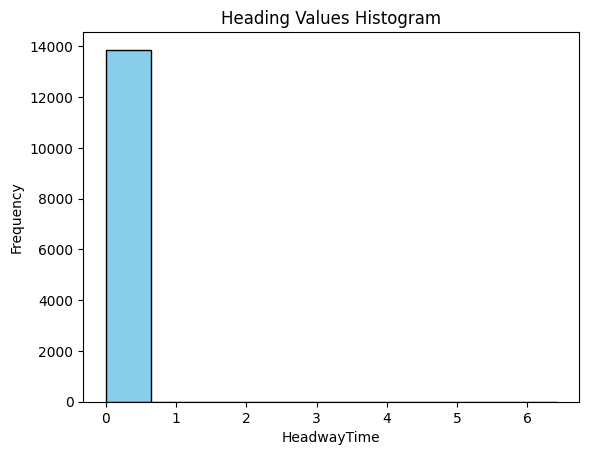

In [12]:
import matplotlib.pyplot as plt
plt.hist(df['HeadwayTime'], bins=10, color='skyblue', edgecolor='black')
# Add labels and title
plt.xlabel('HeadwayTime')
plt.ylabel('Frequency')
plt.title('Heading Values Histogram')

In [4]:
df_slice=df[df['HeadwayTime']<5000]

In [5]:
df_slice.columns

Index(['DatTime', 'MediaTime', 'LonAccel', 'LatAccel', 'Throttle', 'Brake',
       'Gear', 'Heading', 'HeadwayDistance', 'HeadwayTime', 'Lane',
       'LaneOffset', 'RoadOffset', 'Steer', 'Velocity', 'XPos', 'YPos',
       'LeadVehPosX', 'LeadVehPosY', 'FollowCarBrakingStatus'],
      dtype='object')

In [8]:
import plotly.express as px
fig = px.line(df_slice, x="DatTime", y="HeadwayTime", title='HeadwayTime vs DatTime')
fig.show()